## PROYECTO: Modelación de Factores para diagnosticar Diabetes

### Equipo:

> Carolina Barba Anaya (if720071)

> Marco Antonio Ochoa Cárdenas (if720072)

### Objetivos
 
>### **Objetivo general**
>Con ayuda de una base de datos que describe el padecimiento de una enfermedad, en este caso diabetes, simular el comportamiento de variables que resultan ser detonantes para la aparición de la diabetes en las personas. Una vez realizadas dichas simulaciones, probar la correlación que existe en dichas variables para determinar los factores que resultan de mayor riesgo para que una persona pueda padecer dicha enfermedad. 

> ### **Objetivos particulares**
>Elegir de la base de datos las causas más comunes e importantes que se deben tomar en cuenta para ser diagnosticado con diabetes y realizar una simulación de estas: 

> * Nivel de glucosa
> * Índice de masa corporal
> * Cantidad de Insulina
> * Edad

### Definicion del problema:
> Dado el U.S Department of Health and Humane Services, la diabetes es una enfermedad crónica (de larga duración) que afecta la forma en que el cuerpo convierte los alimentos en energía. La mayoría de los alimentos que come se convierten en azúcar (también llamada glucosa) que se libera en el torrente sanguíneo.

> Se estima que en Estados Unidos exiten mas de 34.2 millones de personas que viven con diabetes de las cuales representan el 10.5 % de la poblacion total, a su vez este numero arrojo que en el año 2020 se dieron casi 32000 casos de defunciones a causa de estar enfermedad

> Es por ello que un estudio de las principales causas que detonan la aparición de esta enfermedad son vitales para salvar y prevenir a tiempo la deteccion de esta y en su caso al tenerla, tener las herramientas y datos correctos para atender la problemática

### Definición de hipótesis y supuestos.
>* Los eventos del dataset son independientes.
>* Se cuenta con una variable llamada "Outcome" que hace referencia al diagnostico dado por el especialista en el ramo, esta arroja si el paciente tiene o no la enfermedad 
>* Se cuentan con una base de datos amplia por lo que estas son suficientes para dar una respuesta concluyente.
>* Como los datos de nuestro dataset son independientes, es probable que cada variable vaya a tener una distribución distinta

### Nodos a simular
> * Probabilidad de ser diagnosticado con diabetes dado el nive de glucosa del paciente
> * Probabilidad de ser diagnosticado con diabetes dado el IMC (indice de masa corporal) del paciente
> * Probabilidad de ser diagnosticado con diabetes dada la cantidad de insulina en el cuerpo del paciente
> * Personas que son diagnosticadas con diabetes dada su edad

>### **Justificación** 
>* Nodo 1 :Cuando la glucosa entra en las células, la cantidad de glucosa en el torrente sanguíneo disminuye. Si tienes diabetes  el páncreas no secreta insulina, lo que provoca una acumulación de glucosa en el torrente sanguíneo. Sin la insulina, la glucosa no puede ingresar en las células.
>* Nodo 2: El índice de masa corporal es una medida útil para determinar si una persona tiene diabetes dado que es un potenciador de riesgo para detectar diabetes en la poblacion 
>* Nodo 3: La insulina es una hormona que toma glucosa de la sangre y la transporta al interior de las células del cuerpo donde se usa como energía. La diabetes ocurre cuando el páncreas no produce suficiente insulina o cuando el cuerpo no usa la insulina debidamente (llamado resistencia a la insulina).
>* Nodo 4: Existe un estudio que muestra que la diabetes aparece en la edad madura, pasados los 45 años de edad, por lo que se quiere simular si la edad es un potenciador de desarrollo de la enfermedad

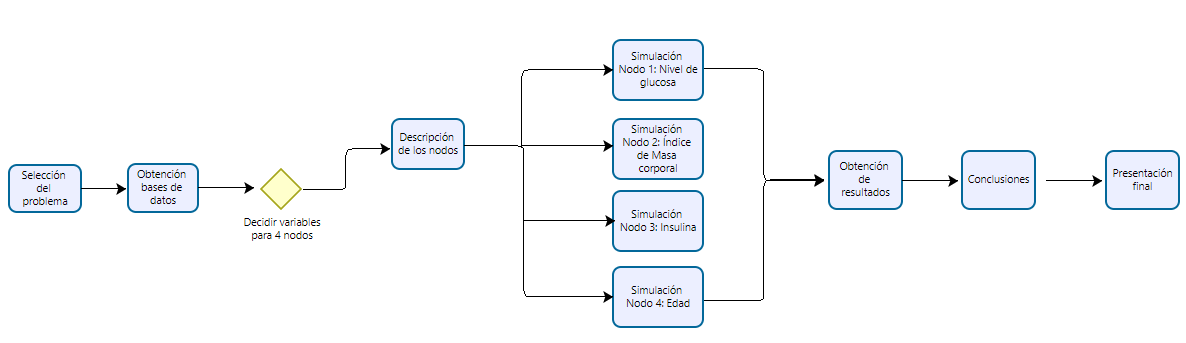

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
from fitter import Fitter
from scipy import optimize
import scipy.special as sps
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from statsmodels.nonparametric.kernel_density import KDEMultivariate
%matplotlib inline

In [2]:
data = pd.read_csv(r'C:\Users\Caro\Documents\Carolina\Semestre 7\SPF\Proyecto_CBARBA_MAOCHOA\diabetes.csv') #imporatción de datos
#data = pd.read_csv(r"C:\Users\marco\Downloads\PROYECTO_CBARBA_MAOCHOA\diabetes.csv")
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
glucose= pd.DataFrame(data['Glucose'])# extracción de columna glucose
strokeBy_glucose = glucose.join(pd.DataFrame(data['Outcome']))# creación de un dataframe que contiene tanto a la columna glucose como a stroke
strokes = strokeBy_glucose['Outcome']==1#creación de filtro
strokeBy_glucose=strokeBy_glucose[strokes]#aplicación de filtro
strokeBy_glucose=strokeBy_glucose.set_index(np.arange(len(strokeBy_glucose))) # generación de nuevo indice

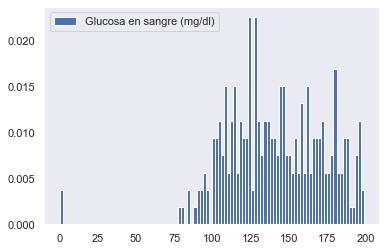

In [4]:
mu = np.mean(strokeBy_glucose['Glucose']); sigma = np.std(strokeBy_glucose)
divisiones = 100
plt.hist(strokeBy_glucose['Glucose'],divisiones,density=True,label='Glucosa en sangre (mg/dl)')
plt.legend(loc='best')
plt.grid()
plt.show()

Dada la gráfica obtenida, podemos ver como es que todos los datos estan distruibuidos normalmente, salvo por uno que esta lejos de la distribucion, por lo que no sera necesario dividir la nuestra en dos partes y solo tomaremos los datos de la derecha

## Nodo 1: GLUCOSA

Porque es importante medir la glucosa en sangre para la deteccicón del diabetes: 

El cuerpo necesita insulina para que la glucosa contenida en la sangre pueda entrar en las células del cuerpo, que la utilizan como fuente de energía. En las personas que han desarrollado una diabetes, la glucosa se acumula en la sangre, provocando una hiperglucemia.

>* Un nivel de glucosa sanguínea en ayunas por debajo de 100 miligramos por decilitro (mg/dl) (5,6 milimoles por litro [mmol/l]) se considera normal.

>* Un nivel de glucosa sanguínea en ayunas entre 100 y 125 mg/dL (5,6 a 7,0 mmol/L) se considera prediabetes. Este resultado se denomina a veces glucosa en ayunas alterada.

>* Un nivel de glucosa sanguínea en ayunas de 126 mg/dL (7,0 mmol/L) o superior indica diabetes tipo 2.

In [5]:
lim200=strokeBy_glucose['Glucose']>75 #selección de solo aquellos niveles de glucosa mayores a 75
strokeBy_glucose_2 = strokeBy_glucose[lim200]#selección de datos que cumplen con el filtro previamente especificado
strokeBy_glucose_2=strokeBy_glucose_2.set_index(np.arange(len(strokeBy_glucose_2))) # generación de nuevo indice

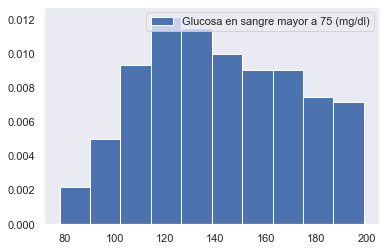

In [6]:
divisiones = 10
plt.hist(strokeBy_glucose_2['Glucose'],divisiones,density=True,label='Glucosa en sangre mayor a 75 (mg/dl)')
plt.legend(loc='best')
plt.grid()
plt.show()

Como se puede observar en la grafica, apararentemente se puede decir que la parte izquierda de la seccion de los datos muestra una distribucion normal en el rango de 80-140 mg/dl, a partir de 140mg/dl la distribucion deja de tener la apriancia de normatividad, por lo cual procederemos a realizar unas cuantas pruebas que nos ayuden a tener certeza de la distribucion de los datos

In [7]:
strokeBy_glucose_2

,Glucose,Outcome
0,148,1
1,183,1
2,137,1
3,78,1
4,197,1
...,...,...
261,128,1
262,123,1
263,190,1
264,170,1


### KDE

In [8]:
def bw_kdem(datos): #Funcion que regresa bandwith estimado para conjunto de datos
    kde_m = KDEMultivariate(data = datos , var_type = "c", bw = "normal_reference")
    return kde_m.bw

In [9]:
data_a = np.array(strokeBy_glucose_2["Glucose"]).flatten()
bw_f = bw_kdem(strokeBy_glucose_2["Glucose"])
bw_f # bandwith con la funcion  

array([10.25159921])

In [29]:
def var_ar(R_2, R_1, f, t, n): #Funcion que genera variables aleatorias para que sean aceptadas 
    fx = f(R_1)
    tx = t(R_1)
    condicion = R_2 * tx <= fx # si se cumple la condición, los valores son aceptados
    cont = 0
    x = []
    i = 0
    while cont < n:
        if condicion[i]:
            x.append(R_1[i])
            cont += 1
        else:
            pass 
        i += 1
    return np.array(x) # valores aceptados en un array

In [30]:
# Generar f y t
x_a = np.arange(data_a.min(), data_a.max())
kd_s = KernelDensity(bandwidth = bw_f, kernel = "gaussian").fit(data_a[:, np.newaxis])
f = lambda data_a: np.exp(kd_s.score_samples(data_a[:, None])) # función de densidad g(x)
a = f(optimize.fmin(lambda x_a: -f(x_a), 16, disp = False))
t = lambda x_a: a * np.ones([len(x_a)])

In [31]:
def complementarios(N): #Funcion que regresa R_2 con metodo de reduccion de varianza num. complementarios
    r_2a = np.random.rand(int(N / 2)) 
    r_2b = 1 - r_2a
    return np.concatenate([r_2a, r_2b])

In [50]:
# Validación del método con reducción de varianza
N = 10000
R_2 = complementarios(N)
R_1 = np.random.uniform(data_a.min(), data_a.max(), size = N)
val_rv = var_ar(R_2, R_1, f, t, 100)

In [51]:
def hist_bd(bandwidth, datos, f, title, xlabel, xgrid): # Funcion que grafica el histograma de los datos usando bandwith 
                                                                 # con la funcion densidad
    plt.figure(figsize = [8, 6])
    plt.plot(x_a, f(x_a), color = "black")
    plt.hist(datos, bins = int(datos.max() / bandwidth), density = True, color = "g")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Frecuencia relativa")
    plt.show()

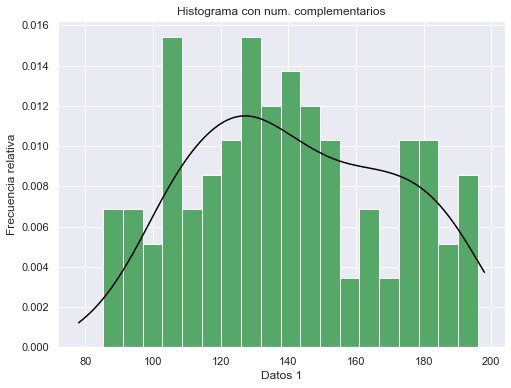

In [52]:
# Histograma
hist_bd1 = hist_bd(bw_f, val_rv, f, "Histograma con num. complementarios", 
                        "Datos 1", x_a)
hist_bd1

In [53]:
def estratos_i(N):#Funcion que regresa R_2 con metodo de reduccion de varianza con estratos igualmente espaciados
    E = N
    U2 = np.random.rand(E)
    i = np.arange(0, E)
    return (U2 + i) / E

In [54]:
# Validación del método 
N = 1000 
R_1 = np.random.uniform(data_a.min(), data_a.max(), size = N)
R_2 = estratos_i(N)
val_rv_2 = var_ar(R_2, R_1, f, t, 100)

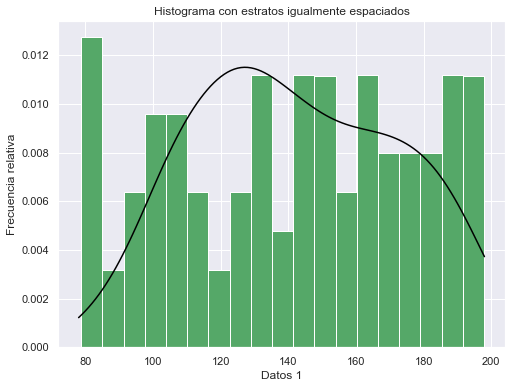

In [55]:
# Histograma
hist_bd2 = hist_bd(bw_f, val_rv_2, f, "Histograma con estratos igualmente espaciados",
                        "Datos 1", x_a)
hist_bd2

In [56]:
def estratos_dif(N):#Funcion que regresa R_2 con metodo de reduccion de varianza estratificado diferente
    r_1 = np.random.uniform(0, 0.6, 80) 
    r_2 = np.random.uniform(0.6, 1, 220)
    r = [r_1, r_2] 
    w = [(80 / N) / (0.6 - 0), (220 / N) / (1 - 0.6)] 
    return np.concatenate(list(map(lambda r_i, wi: r_i / wi, r, w)))

In [57]:
# Validación del método 
N = 300
R_1 = np.random.uniform(data_a.min(), data_a.max(), size = N)
R_2 = estratos_dif(N)
val_rv_3 = var_ar(R_2, R_1, f, t, 100)

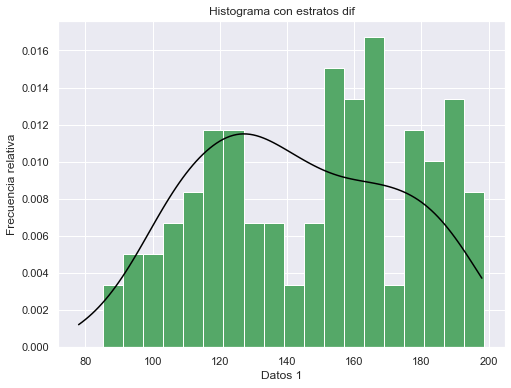

In [49]:
# Histograma
hist_bd3 = hist_bd(bw_f, val_rv_3, f, "Histograma con estratos dif", "Datos 1", x_a)
hist_bd3

### Quantil-Quantil

### Distribución normal

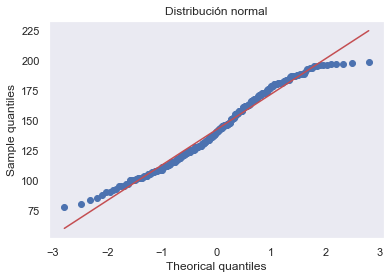

In [65]:
# Grafica de la distribucion normal
st.probplot(strokeBy_glucose_2['Glucose'],dist="norm",plot=plt)
plt.grid()
plt.title('Distribución normal')
plt.xlabel('Theorical quantiles')
plt.ylabel('Sample quantiles')
plt.show()

### Distribución t con pocos grados de libertad 

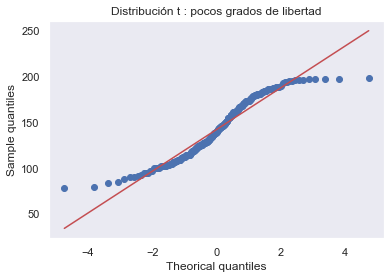

In [13]:
# Grafica de la distribucion t con pocos grados de libertad
st.probplot(strokeBy_glucose_2['Glucose'],dist="t",sparams=(5),plot=plt)
plt.title('Distribución t : pocos grados de libertad')
plt.xlabel('Theorical quantiles')
plt.ylabel('Sample quantiles')
plt.grid()
plt.show()

### Distribución t con mas grados libertad

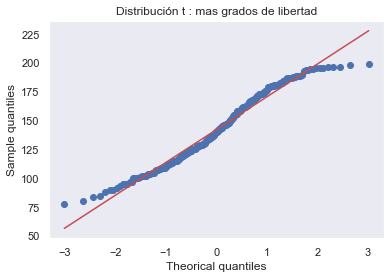

In [14]:
st.probplot(strokeBy_glucose_2['Glucose'],dist="t",sparams=(30),plot=plt)
plt.title('Distribución t : mas grados de libertad')
plt.xlabel('Theorical quantiles')
plt.ylabel('Sample quantiles')
plt.grid()
plt.show()

### Prueba de Hipotesis

 Dados los resultados anteriores, se procederá a realizar una prueba de hipótesis tal que : 
> $H_0$: los datos de la sección derecha siguen una distribución normal 

> $H_a$: los datos de la sección derecha no siguen dicha distribución

Valor chi cuadrado Power_divergenceResult(statistic=102.83446443265674, pvalue=0.37588258081700016)
Estadístico de prueba 120.98964369660958
Media muestral =  142.31954887218046 
Desviación estándar muestral =  29.543509289687776


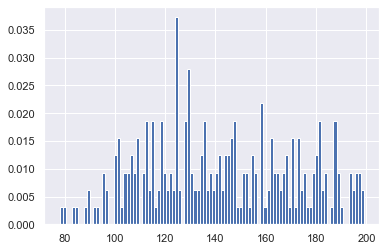

In [15]:
mu_observada = np.mean(strokeBy_glucose_2['Glucose']) ;sigma_observada=np.std(strokeBy_glucose_2['Glucose']) 
n1 = np.random.normal(mu_observada,sigma_observada,len(strokeBy_glucose_2['Glucose']))
particiones = 100
[freq,x,p]=plt.hist(strokeBy_glucose_2['Glucose'],particiones,density=True)
x=x[:-1]
mu = np.mean(x) ;sigma = np.std(x)
pi = st.norm.pdf(x,loc=mu,scale=sigma)
Ei = pi*x
chi_2=st.chisquare(freq,Ei)

p=2
m = particiones-p-1
chi_est = st.chi2.ppf(q=0.95,df=m)
print('Valor chi cuadrado',chi_2)
print('Estadístico de prueba',chi_est)
print('Media muestral = ',mu_observada,'\nDesviación estándar muestral = ',sigma_observada)

Como indicaban los estudios del Mayor Clinic al realizar la prueba del chi cuadrado y la media muestral esta nos arrojo 142.31 (mg/dl), lo cual confirma la hipotesis de que una persona que este dentro de ese rango es más propensa a tener diabetes

### Estimación de $\mu$ y $\sigma^2$ a través del método de máxima verosimilitud

Considerando que nuestros datos siguen una distribución normal, tenemos la siguiente función de densidad de probabilidad: 
$$f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}$$

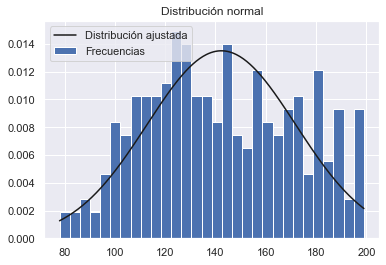

In [16]:
np.random.seed(1111)
parametros = st.norm.fit(np.asarray(strokeBy_glucose_2['Glucose']))
x = np.linspace(min(strokeBy_glucose_2['Glucose']),max(strokeBy_glucose_2['Glucose']),len(strokeBy_glucose_2['Glucose']))
pdf_fitted = st.norm.pdf(x,loc=parametros[0],scale=parametros[1])
pdf=st.norm.pdf(x)
plt.title('Distribución normal')
plt.plot(x,pdf_fitted,'k-',label='Distribución ajustada')
plt.hist(np.asarray(strokeBy_glucose_2['Glucose']),30,density=1,alpha=1 ,label='Frecuencias')
plt.legend(loc='best')
plt.show()

## Simulación Glucosa

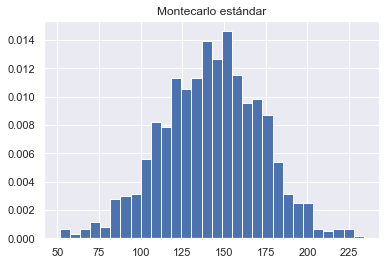

142.34938719830026

In [17]:
N = 1000
# Método montecarlo estándar 
montecarlo_standar = st.norm.ppf(np.random.rand(N), loc=parametros[0], scale=parametros[1])
plt.hist(montecarlo_standar,30,density=True)
plt.title('Montecarlo estándar')
plt.show()
montecarlo_standar.mean()

Esta simulación Montecarlo nos ayuda a visualizar que efectivamente nuestros datos estan distribuidos normalmente 
En conclusión podemos decir que el indice de glucosa en sangre es un referente confiable para poder determinar si una persona es propensa o no a padecer diabetes

## NODO 2: INDICE DE MASA CORPORAL

Se considera que un adulto, entre otros factores, tiene sobrepeso si tiene un índice de masa corporal (IMC) de entre los 25 y 29,9 kg/m2 y obesidad con un IMC superior a 30 kg/m2. El aumento del IMC se asocia con un mayor riesgo de sufrir diabetes así como, la obesidad abdominal se ha convertido en un factor predictivo fiable de sufrir esta enfermedad, según la OMS.

In [ ]:
strokes_imc = data.loc[data['Outcome']==1]
imc = strokes_imc['BMI'].dropna()
imc= pd.DataFrame(imc)
imc=imc.set_index(np.arange(len(imc)))
imc.hist()
plt.show()

De igual forma que con la glucosa todos los datos se encuentran inclinados a la derecha, salvo un sesgo atipico que no nos dara información relevante para determinar si el Indice de Masa Corporal (BMI por sus siglas en ingles), por lo tanto solo utilizaremos los datos de la derecha

In [ ]:
bmis=strokes_imc['BMI']>20 #selección de solo imc mayor a 20
strokes_imc2 = strokes_imc[bmis]#selección de datos que cumplen con el filtro previamente especificado
strokes_imc2 = strokes_imc2.set_index(np.arange(len(strokes_imc2))) # generación de nuevo indice

In [ ]:
divisiones = 10
plt.hist(strokes_imc2['BMI'],divisiones,density=True,label='IMC mayor a 20')
plt.legend(loc='best')
plt.grid()
plt.show()

Como podemos observar en la grafica la mayor concentración de los datos esta entre los 20 y 40 kg/m2, por lo cual los datos hacen sentido a la infromacion del estudio realizado por la OMS, ya que son los rangos de sobrepeso y obesidad

### Distribución normal

In [ ]:
st.probplot(strokes_imc2['BMI'],dist="norm",plot=plt)
plt.grid()
plt.title('Distribución normal')
plt.xlabel('Theorical quantiles')
plt.ylabel('Sample theorical quantiles')
plt.show()

### Distribución t con pocos grados de libertad 

In [ ]:
# Grafica de la distribucion t con pocos grados de libertad

st.probplot(strokes_imc2['BMI'],dist="t",sparams=(5),plot=plt)
plt.title('Distribución t : pocos grados de libertad')
plt.xlabel('Theorical quantiles')
plt.ylabel('Sample quantiles')
plt.grid()
plt.show()

### Distribución t con mas grados libertad

In [ ]:
st.probplot(strokes_imc2['BMI'],dist="t",sparams=(30),plot=plt)
plt.title('Distribución t : mas grados de libertad')
plt.xlabel('Theorical quantiles')
plt.ylabel('Sample quantiles')
plt.grid()
plt.show()

### Estimación de $\mu$ y $\sigma^2$ a través del método de máxima verosimilitud

Considerando que nuestros datos siguen una distribución normal, tenemos la siguiente función de densidad de probabilidad: 
$$f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}$$

In [ ]:
# Histograma de las variables creadas
p1 = st.norm.fit(strokes_imc2['BMI']) #Obtengamos los parámetros por máxima verosimilitud
divisiones = 60 # Cantidad de barras en el histograma
plt.hist(strokes_imc2['BMI'],divisiones,density=True)
x = np.arange(20,60,.1)
y = st.norm.pdf(x,loc = p1[0], scale = p1[1])
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()

### Prueba de Hipotesis

Dados los resultados anteriores, se procederá a realizar una prueba de hipótesis tal que : 
> $H_0$: los datos de la sección derecha siguen una distribución normal 

> $H_a$: los datos de la sección derecha no siguen dicha distribución

In [ ]:
[freq,x,p]=plt.hist(strokes_imc2['BMI'],60,density=True)
plt.show()
# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 
pi = st.norm.pdf(x,loc=p1[0],scale=p1[1])
# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi

In [ ]:
# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',X2)
print('Podemos ver que el pvalue es 0.9086, por lo que nuestro ajuste con Normal es correcto')

Al realizar la prueba de chi podemos ver que los datos efectivamente corroboran la hipotesis de que el indice de masa corporal es un factor de riesgo para desarrollar diabetes

### Simulación IMC

In [ ]:
N = 1000
# Método montecarlo estándar 
montecarlo_standar = st.norm.ppf(np.random.rand(N), loc=p1[0], scale=p1[1])
plt.hist(montecarlo_standar,30,density=True)
plt.title('Montecarlo estándar')
plt.show()
montecarlo_standar.mean()

La simulacion montecarlo indica que la media es de 35.28, esto quiere decir que las personas que tienen un IMC cercano a este valor son las mas propensas y segun los estudios estan personas mayormente tienen obesidad 

### Nodo 3 Insulina

In [ ]:
strokes_insu = data.loc[data['Outcome']==1]
ins = strokes_insu['Insulin'].dropna()
ins= pd.DataFrame(ins)
ins=ins.set_index(np.arange(len(ins)))
ins.hist()
plt.show()

In [ ]:
insu=strokes_insu['Insulin']>100 #selección de solo insulina mayor a 100
strokes_insu2 = strokes_insu[insu]#selección de datos que cumplen con el filtro previamente especificado
strokes_insu2= strokes_insu2.set_index(np.arange(len(strokes_insu2))) # generación de nuevo indice

In [ ]:
divisiones = 10
plt.hist(strokes_insu2['Insulin'],divisiones,density=True,label='Insulina mayor a 100')
plt.legend(loc='best')
plt.grid()
plt.show()

### Distribución normal

In [ ]:
st.probplot(strokes_insu2['Insulin'],dist="norm",plot=plt)
plt.grid()
plt.title('Distribución normal')
plt.xlabel('Theorical quantiles')
plt.ylabel('Sample theorical quantiles')
plt.show()

### Distribución t con pocos grados de libertad 

In [ ]:
# Grafica de la distribucion t con pocos grados de libertad

st.probplot(strokes_insu2['Insulin'],dist="t",sparams=(5),plot=plt)
plt.title('Distribución t : pocos grados de libertad')
plt.xlabel('Theorical quantiles')
plt.ylabel('Sample quantiles')
plt.grid()
plt.show()

### Distribución t con mas grados libertad

In [ ]:
st.probplot(strokes_insu2['Insulin'],dist="t",sparams=(30),plot=plt)
plt.title('Distribución t : mas grados de libertad')
plt.xlabel('Theorical quantiles')
plt.ylabel('Sample quantiles')
plt.grid()
plt.show()

### Estimación de $\mu$ y $\sigma^2$ a través del método de máxima verosimilitud

Considerando que nuestros datos siguen una distribución normal, tenemos la siguiente función de densidad de probabilidad: 
$$f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}$$

In [ ]:
# Histograma de las variables creadas
p1 = st.norm.fit(strokes_insu2['Insulin']) #Obtengamos los parámetros por máxima verosimilitud
divisiones = 60 # Cantidad de barras en el histograma
plt.hist(strokes_insu2['Insulin'],divisiones,density=True)
x = np.arange(100,600,.1)
y = st.norm.pdf(x,loc = p1[0], scale = p1[1])
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()

### Prueba de Hipotesis

Dados los resultados anteriores, se procederá a realizar una prueba de hipótesis tal que : 
> $H_0$: los datos de la sección derecha siguen una distribución normal 

> $H_a$: los datos de la sección derecha no siguen dicha distribución

In [ ]:
[freq,x,p]=plt.hist(strokes_insu2['Insulin'],60,density=True)
plt.show()
# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 
pi = st.norm.pdf(x,loc=p1[0],scale=p1[1])
# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi

In [ ]:
# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',X2)
print('Podemos ver que el pvalue es 0.99999, por lo que nuestro ajuste con Normal es correcto')

### Simulación Insulina

In [ ]:
N = 1000
# Método montecarlo estándar 
montecarlo_standar = st.norm.ppf(np.random.rand(N), loc=p1[0], scale=p1[1])
plt.hist(montecarlo_standar,30,density=True)
plt.title('Montecarlo estándar')
plt.show()
montecarlo_standar.mean()

In [ ]:
insulin= pd.DataFrame(data['Insulin'])# extracción de columna glucose
strokeBy_insulin = insulin.join(pd.DataFrame(data['Outcome']))# creación de un dataframe que contiene tanto a la columna glucose como a stroke
insulin = strokeBy_insulin['Outcome']==1#creación de filtro
strokeBy_insulin=strokeBy_insulin[insulin]#aplicación de filtro
strokeBy_insulin=strokeBy_insulin.set_index(np.arange(len(strokeBy_insulin)))

In [ ]:
insudist = strokeBy_insulin['Insulin']
plt.hist(insudist)
plt.grid()
plt.title("Distribución de frecuencias de hipertensión")

In [ ]:
prob = list([i for i in insudist if i==0])
p = len(prob)/len(insudist)
p

### Nodo 4 Edad

In [ ]:
strokes_age = data.loc[data['Outcome']==1]
age = strokes_age['Age'].dropna()
age= pd.DataFrame(age)
age=age.set_index(np.arange(len(age)))
age.hist()
plt.show()

In [ ]:
ages=strokes_age['Age']>21 #selección de solo edad mayor a 21
strokes_age2 = strokes_age[ages]#selección de datos que cumplen con el filtro previamente especificado
strokes_age2= strokes_age2.set_index(np.arange(len(strokes_age2))) # generación de nuevo indice

In [ ]:
divisiones = 10
plt.hist(strokes_age2['Age'],divisiones,density=True,label='Edad mayor a 21')
plt.legend(loc='best')
plt.grid()
plt.show()

### Distribución normal

In [ ]:
st.probplot(strokes_age2['Age'],dist="norm",plot=plt)
plt.grid()
plt.title('Distribución normal')
plt.xlabel('Theorical quantiles')
plt.ylabel('Sample theorical quantiles')
plt.show()

### Distribución t con pocos grados de libertad 

In [ ]:
# Grafica de la distribucion t con pocos grados de libertad

st.probplot(strokes_age2['Age'],dist="t",sparams=(5),plot=plt)
plt.title('Distribución t : pocos grados de libertad')
plt.xlabel('Theorical quantiles')
plt.ylabel('Sample quantiles')
plt.grid()
plt.show()

### Distribución t con mas grados libertad

In [ ]:
st.probplot(strokes_age2['Age'],dist="t",sparams=(30),plot=plt)
plt.title('Distribución t : mas grados de libertad')
plt.xlabel('Theorical quantiles')
plt.ylabel('Sample quantiles')
plt.grid()
plt.show()

### Estimación de $\mu$ y $\sigma^2$ a través del método de máxima verosimilitud

Considerando que nuestros datos siguen una distribución normal, tenemos la siguiente función de densidad de probabilidad: 
$$f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}$$

In [ ]:
# Histograma de las variables creadas
p1 = st.norm.fit(strokes_age2['Age']) #Obtengamos los parámetros por máxima verosimilitud
divisiones = 60 # Cantidad de barras en el histograma
plt.hist(strokes_age2['Age'],divisiones,density=True)
x = np.arange(21,70,.1)
y = st.norm.pdf(x,loc = p1[0], scale = p1[1])
plt.plot(x,y,'r--')
plt.ylabel('Probability')
plt.grid()
plt.show()

### Prueba de Hipotesis

Dados los resultados anteriores, se procederá a realizar una prueba de hipótesis tal que : 
> $H_0$: los datos de la sección derecha siguen una distribución normal 

> $H_a$: los datos de la sección derecha no siguen dicha distribución

In [ ]:
[freq,x,p]=plt.hist(strokes_age2['Age'],60,density=True)
plt.show()
# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 
pi = st.norm.pdf(x,loc=p1[0],scale=p1[1])
# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi

In [ ]:
# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq,Ei)
print('Valor de chi cuadrado librería = ',X2)
print('Podemos ver que el pvalue es 0.9463, por lo que nuestro ajuste con Normal es correcto')

### Simulación Edad

In [ ]:
N = 1000
# Método montecarlo estándar 
montecarlo_standar = st.norm.ppf(np.random.rand(N), loc=p1[0], scale=p1[1])
plt.hist(montecarlo_standar,30,density=True)
plt.title('Montecarlo estándar')
plt.show()
montecarlo_standar.mean()

In [ ]:
edad= pd.DataFrame(data['Age'])# extracción de columna glucose
strokeBy_edad = edad.join(pd.DataFrame(data['Outcome']))# creación de un dataframe que contiene tanto a la columna glucose como a stroke
edad = strokeBy_edad['Outcome']==1#creación de filtro
strokeBy_edad=strokeBy_edad[edad]#aplicación de filtro
strokeBy_edad=strokeBy_edad.set_index(np.arange(len(strokeBy_edad)))

In [ ]:
edaddist = strokeBy_edad['Age']
plt.hist(edaddist)
plt.grid()
plt.title("Distribución de frecuencias de Edad")

In [ ]:
prob = list([i for i in edaddist if i==0])
p = len(prob)/len(edaddist)
p